# Практика

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [30]:
# ваш код тут
#Непрерывная случайная величина Коши - cauchy

expon_rv = sts.expon()
sample = expon_rv.rvs(1000)
sample


array([1.53118681e-01, 1.74303522e+00, 2.28104768e-01, 2.56063547e+00,
       3.63799711e-01, 2.52710632e-01, 9.37115741e-01, 3.46378692e+00,
       1.32562665e+00, 1.10816725e+00, 4.72455583e-01, 2.77351557e+00,
       5.82881540e-02, 1.11334394e+00, 5.44059239e-01, 2.83972760e-02,
       1.57144649e+00, 1.19534585e-01, 1.00006361e-01, 1.65444710e-01,
       1.08671985e+00, 1.29289111e-01, 1.21503127e+00, 4.51506546e+00,
       1.57524831e+00, 5.03285917e-01, 2.61596081e-01, 1.10595767e+00,
       8.82271626e-01, 5.32858539e+00, 1.22857243e+00, 4.08093345e-01,
       4.02111675e-01, 1.00130732e+00, 3.86110333e-01, 2.50181466e+00,
       1.24403926e+00, 6.46784873e-02, 1.02269610e+00, 3.28724476e+00,
       1.73645051e-01, 2.98545816e-01, 6.69798199e-01, 6.85128209e-01,
       4.98918162e-01, 1.40859864e+00, 3.34160892e-01, 1.07997018e+00,
       6.33812319e-01, 1.16074794e-02, 4.64861813e-01, 3.06822047e-01,
       1.44875999e+00, 2.14170775e-01, 6.64686830e-01, 2.19091962e+00,
      

In [31]:
sample.dtype

dtype('float64')

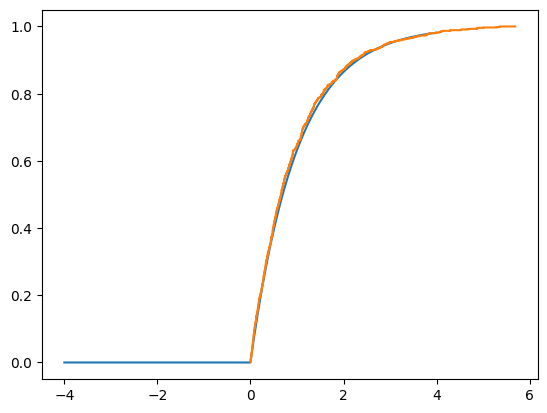

In [32]:
x = np.linspace(-4,4,1000)
cdf = expon_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Библиотека для оценки
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')



In [33]:
N = 100
NN = 10000
# сгенерируем много выборочных средних
real_mean = []
for i in range(NN):
    real_mean.append(np.mean(expon_rv.rvs(N)))


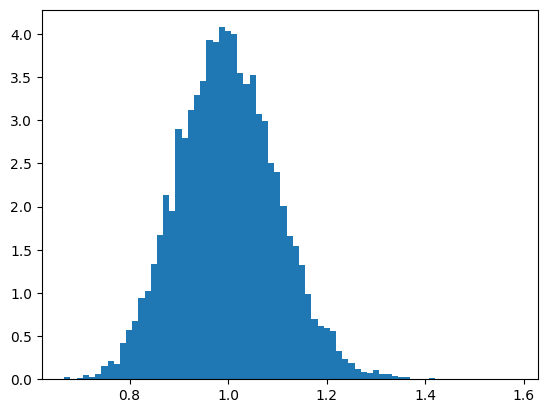

In [34]:
plt.hist(real_mean, density=True, bins='auto');

In [35]:
real_mean = expon_rv.mean() # настоящее среднее случайной величины
real_mean

1.0

In [36]:
real_var = expon_rv.var() # настоящая дисперсия случайной величины
real_var

1.0

### Постройте гистограмму выборки и теоретическую плотность распределения

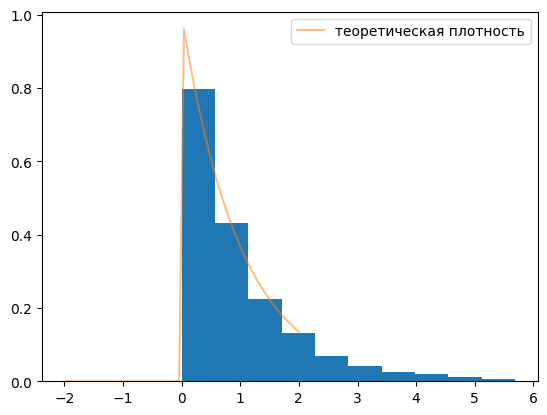

In [37]:
# ваш код тут

plt.hist(sample, density=True)
x = np.linspace(-2,2,50)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()


In [38]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.9677417971683401
0.9466772989982241


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

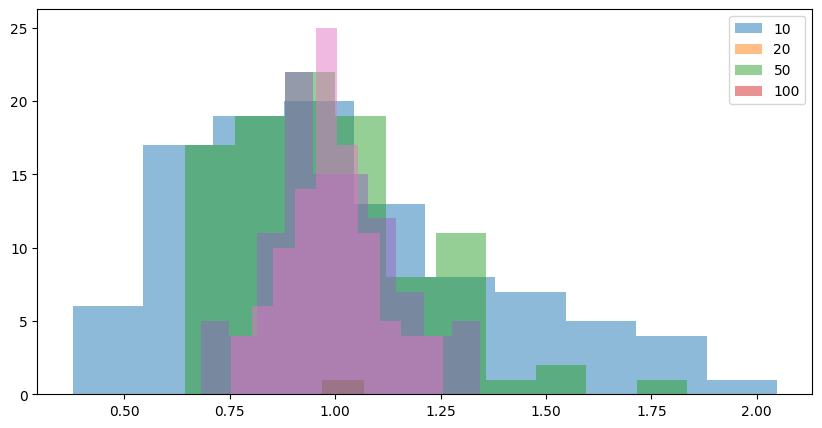

In [39]:
# ваш код тут
plt.figure(figsize=(10,5))
# сгенерируем много выборочных средних
for N in [10,20,50,100]:
    means = []
    for i in range(100):
          means.append(np.mean(expon_rv.rvs(N)))
    plt.hist(means, alpha=0.5)
    plt.hist(sample_mean, alpha=0.5)

plt.legend(['10', '20', '50', '100'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [40]:
#Ваш ответ: я думаю, что для Экспоненциальной непрерывно случайной величины апроксимация распределения выборочного среднего работает бриближенно к "хорошо", т.к. цент ее находится в 1.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [41]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [42]:
df['total day calls'].mean()

100.43564356435644

In [43]:
df['total day calls'].var()

402.76814091973426

In [44]:
df['total day calls'].std()

20.069084207300897

[]

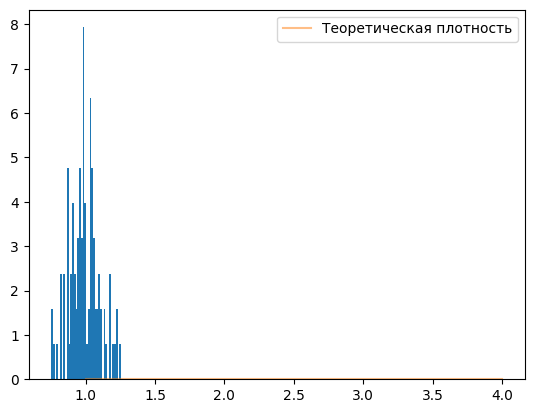

In [57]:
norm_rv = sts.norm(loc=df['total day calls'].mean(), scale=df['total day calls'].std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [56]:
#data = df['total day calls'].rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(df['total day calls']) - 1.96 * np.std(df['total day calls'], ddof=1)/ np.sqrt(N), np.mean(df['total day calls']) + 1.96 * np.std(df['total day calls'], ddof=1)/ np.sqrt(N)
)) #uniform_rv.std()
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(df['total day calls']),
                      scale= np.std(df['total day calls'], ddof=1)/ np.sqrt(N))# alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df['total day calls']), std_mean=np.std(df['total day calls'], ddof=1)/np.sqrt(N), alpha=0.05, alternative='2s')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [96.50210305972547, 104.36918406898741] 
Доверительный интервал для среднего по цпт интервальная оценка: (96.5021753394553, 104.36911178925757) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (96.5021753394553, 104.36911178925757) 
